In [1]:
from keras.datasets import mnist
import matplotlib.pyplot as plt
from keras.preprocessing import image
import numpy as np
import random
%matplotlib inline
import cv2
import os
from subprocess import call

/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [49]:
def get_box(canvass, base_coord=[0,0], show_graph = False):
    top_boundary = 0
    bottom_boundary = canvass.shape[0]-1
    left_boundary = 0
    right_boundary = canvass.shape[1]-1
    for i in range(canvass.shape[0]):
        for j in range(canvass.shape[1]):
            if canvass[i][j]:
                bottom_boundary = i
                break
                
    for i in reversed(range(canvass.shape[0])):
        for j in range(canvass.shape[1]):
            if canvass[i][j]:
                top_boundary = i
                break
                
    for i in range(canvass.shape[1]):
        for j in range(34):
            if canvass[j][i]:
                right_boundary = i
                break
                
    for i in reversed(range(canvass.shape[1])):
        for j in range(34):
            if canvass[j][i]:
                left_boundary = i
                break
    #canvass[top_boundary:bottom_boundary,left_boundary:left_boundary+1] = 255
    #canvass[top_boundary:bottom_boundary,right_boundary-1:right_boundary] = 255
    #canvass[top_boundary:top_boundary+1,left_boundary:right_boundary] = 255
    #canvass[bottom_boundary-1:bottom_boundary,left_boundary:right_boundary] = 255
    if show_graph:
        plt.imshow(canvass)
    return [left_boundary + base_coord[1], top_boundary + base_coord[0], right_boundary + base_coord[1], bottom_boundary + base_coord[0]] 

In [50]:
def get_note(last_digit = -1, can_zero=True):
    canvass = np.zeros([45,28])
    index = random.randint(0,x_train.shape[0]-1)
    while y_train[index] > 7 or y_train[index] == last_digit or (not can_zero and y_train[index] == 0):
        index = random.randint(0,x_train.shape[0]-1)
    canvass[4:32,:] = x_train[index]
    label = y_train[index]
    level_vote = random.randint(0,2)
    if level_vote == 0 or label == 0:
        return canvass, label, get_box(canvass)
    
    if level_vote == 1:
        canvass[0:3,12:15] = 255
        canvass[0:5,11:16] = cv2.GaussianBlur(canvass[0:5,11:16],(3,3),0)
        return canvass, label + 10, get_box(canvass)
    
    if level_vote == 2:
        canvass[41:44,12:15] = 255
        canvass[40:44,11:16] = cv2.GaussianBlur(canvass[40:44,11:16],(3,3),0)
        return canvass, label + 20, get_box(canvass)

In [55]:
canvass, label, box = get_note()

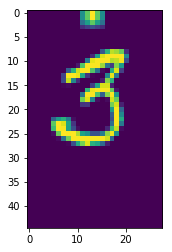

In [56]:
plt.imshow(canvass)

In [57]:
clf = SVC()
	clf.fit(train_data[:, :-1], train_data[:,-1])
	y_pred = clf.predict(test_data[:,:-1])
	y_true = test_data[:,-1]

13

In [58]:
images = tf.constant(X, dtype=tf.float32) # X is a np.array
>>> labels = tf.constant(y, dtype=tf.int32)   # y is a np.array
>>> batch_images, batch_labels = tf.train.batch([images, labels], batch_size=32, capacity=300, enqueue_many=True)

[5, 0, 20, 27]

In [59]:
def generate_music_sheet(num, music_sheet_dir, music_label_dir):
    curr = 0
    call(["rm", "-rf", music_sheet_dir])
    call(["rm", "-rf", music_label_dir])
    if not os.path.isdir(music_sheet_dir):
        os.makedirs(music_sheet_dir)
    if not os.path.isdir(music_label_dir):
        os.makedirs(music_label_dir)
    label_dir = music_label_dir + 'total.txt'
    while curr < num:
        sheet_dir = music_sheet_dir + 'img' + str(curr) + '.png'
        
        canvass, label, box = get_note()
        curr += 1
        print('Progress: ' + "{0:.0f}%".format(curr / num * 100) )
        cv2.imwrite(sheet_dir, canvass)
        with open(label_dir, 'a+') as fp:
            fp.write(sheet_dir + ',' + ','.join(str(e) for e in box) + ',' + str(label)  + '\n')

In [60]:
generate_music_sheet(5000, '../dataset/sheet/training/', '../dataset/label/training/')

Progress: 0%
Progress: 0%
Progress: 0%
Progress: 0%
Progress: 0%
Progress: 0%
Progress: 0%
Progress: 0%
Progress: 0%
Progress: 0%
Progress: 0%
Progress: 0%
Progress: 0%
Progress: 0%
Progress: 0%
Progress: 0%
Progress: 0%
Progress: 0%
Progress: 0%
Progress: 0%
Progress: 0%
Progress: 0%
Progress: 0%
Progress: 0%
Progress: 0%
Progress: 1%
Progress: 1%
Progress: 1%
Progress: 1%
Progress: 1%
Progress: 1%
Progress: 1%
Progress: 1%
Progress: 1%
Progress: 1%
Progress: 1%
Progress: 1%
Progress: 1%
Progress: 1%
Progress: 1%
Progress: 1%
Progress: 1%
Progress: 1%
Progress: 1%
Progress: 1%
Progress: 1%
Progress: 1%
Progress: 1%
Progress: 1%
Progress: 1%
Progress: 1%
Progress: 1%
Progress: 1%
Progress: 1%
Progress: 1%
Progress: 1%
Progress: 1%
Progress: 1%
Progress: 1%
Progress: 1%
Progress: 1%
Progress: 1%
Progress: 1%
Progress: 1%
Progress: 1%
Progress: 1%
Progress: 1%
Progress: 1%
Progress: 1%
Progress: 1%
Progress: 1%
Progress: 1%
Progress: 1%
Progress: 1%
Progress: 2%
Progress: 2%
Progress: 2%

Progress: 14%
Progress: 14%
Progress: 14%
Progress: 14%
Progress: 14%
Progress: 14%
Progress: 14%
Progress: 14%
Progress: 14%
Progress: 15%
Progress: 15%
Progress: 15%
Progress: 15%
Progress: 15%
Progress: 15%
Progress: 15%
Progress: 15%
Progress: 15%
Progress: 15%
Progress: 15%
Progress: 15%
Progress: 15%
Progress: 15%
Progress: 15%
Progress: 15%
Progress: 15%
Progress: 15%
Progress: 15%
Progress: 15%
Progress: 15%
Progress: 15%
Progress: 15%
Progress: 15%
Progress: 15%
Progress: 15%
Progress: 15%
Progress: 15%
Progress: 15%
Progress: 15%
Progress: 15%
Progress: 15%
Progress: 15%
Progress: 15%
Progress: 15%
Progress: 15%
Progress: 15%
Progress: 15%
Progress: 15%
Progress: 15%
Progress: 15%
Progress: 15%
Progress: 15%
Progress: 15%
Progress: 15%
Progress: 15%
Progress: 15%
Progress: 15%
Progress: 15%
Progress: 16%
Progress: 16%
Progress: 16%
Progress: 16%
Progress: 16%
Progress: 16%
Progress: 16%
Progress: 16%
Progress: 16%
Progress: 16%
Progress: 16%
Progress: 16%
Progress: 16%
Progre

Progress: 28%
Progress: 28%
Progress: 28%
Progress: 28%
Progress: 28%
Progress: 28%
Progress: 28%
Progress: 28%
Progress: 28%
Progress: 28%
Progress: 28%
Progress: 28%
Progress: 28%
Progress: 28%
Progress: 28%
Progress: 28%
Progress: 29%
Progress: 29%
Progress: 29%
Progress: 29%
Progress: 29%
Progress: 29%
Progress: 29%
Progress: 29%
Progress: 29%
Progress: 29%
Progress: 29%
Progress: 29%
Progress: 29%
Progress: 29%
Progress: 29%
Progress: 29%
Progress: 29%
Progress: 29%
Progress: 29%
Progress: 29%
Progress: 29%
Progress: 29%
Progress: 29%
Progress: 29%
Progress: 29%
Progress: 29%
Progress: 29%
Progress: 29%
Progress: 29%
Progress: 29%
Progress: 29%
Progress: 29%
Progress: 29%
Progress: 29%
Progress: 29%
Progress: 29%
Progress: 29%
Progress: 29%
Progress: 29%
Progress: 29%
Progress: 29%
Progress: 29%
Progress: 29%
Progress: 29%
Progress: 29%
Progress: 29%
Progress: 29%
Progress: 29%
Progress: 29%
Progress: 30%
Progress: 30%
Progress: 30%
Progress: 30%
Progress: 30%
Progress: 30%
Progre

Progress: 41%
Progress: 41%
Progress: 41%
Progress: 41%
Progress: 41%
Progress: 41%
Progress: 41%
Progress: 41%
Progress: 41%
Progress: 41%
Progress: 41%
Progress: 41%
Progress: 41%
Progress: 41%
Progress: 41%
Progress: 41%
Progress: 41%
Progress: 41%
Progress: 41%
Progress: 41%
Progress: 41%
Progress: 41%
Progress: 41%
Progress: 41%
Progress: 41%
Progress: 41%
Progress: 41%
Progress: 41%
Progress: 41%
Progress: 41%
Progress: 41%
Progress: 41%
Progress: 41%
Progress: 41%
Progress: 41%
Progress: 41%
Progress: 41%
Progress: 41%
Progress: 41%
Progress: 41%
Progress: 41%
Progress: 41%
Progress: 41%
Progress: 41%
Progress: 41%
Progress: 41%
Progress: 41%
Progress: 41%
Progress: 42%
Progress: 42%
Progress: 42%
Progress: 42%
Progress: 42%
Progress: 42%
Progress: 42%
Progress: 42%
Progress: 42%
Progress: 42%
Progress: 42%
Progress: 42%
Progress: 42%
Progress: 42%
Progress: 42%
Progress: 42%
Progress: 42%
Progress: 42%
Progress: 42%
Progress: 42%
Progress: 42%
Progress: 42%
Progress: 42%
Progre

Progress: 54%
Progress: 54%
Progress: 54%
Progress: 54%
Progress: 54%
Progress: 54%
Progress: 54%
Progress: 54%
Progress: 54%
Progress: 54%
Progress: 54%
Progress: 54%
Progress: 54%
Progress: 55%
Progress: 55%
Progress: 55%
Progress: 55%
Progress: 55%
Progress: 55%
Progress: 55%
Progress: 55%
Progress: 55%
Progress: 55%
Progress: 55%
Progress: 55%
Progress: 55%
Progress: 55%
Progress: 55%
Progress: 55%
Progress: 55%
Progress: 55%
Progress: 55%
Progress: 55%
Progress: 55%
Progress: 55%
Progress: 55%
Progress: 55%
Progress: 55%
Progress: 55%
Progress: 55%
Progress: 55%
Progress: 55%
Progress: 55%
Progress: 55%
Progress: 55%
Progress: 55%
Progress: 55%
Progress: 55%
Progress: 55%
Progress: 55%
Progress: 55%
Progress: 55%
Progress: 55%
Progress: 55%
Progress: 55%
Progress: 55%
Progress: 55%
Progress: 55%
Progress: 55%
Progress: 55%
Progress: 55%
Progress: 55%
Progress: 55%
Progress: 56%
Progress: 56%
Progress: 56%
Progress: 56%
Progress: 56%
Progress: 56%
Progress: 56%
Progress: 56%
Progre

Progress: 68%
Progress: 68%
Progress: 68%
Progress: 68%
Progress: 68%
Progress: 68%
Progress: 68%
Progress: 68%
Progress: 68%
Progress: 68%
Progress: 68%
Progress: 68%
Progress: 68%
Progress: 68%
Progress: 68%
Progress: 68%
Progress: 68%
Progress: 68%
Progress: 68%
Progress: 68%
Progress: 68%
Progress: 68%
Progress: 68%
Progress: 68%
Progress: 68%
Progress: 68%
Progress: 68%
Progress: 68%
Progress: 68%
Progress: 68%
Progress: 68%
Progress: 68%
Progress: 68%
Progress: 68%
Progress: 68%
Progress: 69%
Progress: 69%
Progress: 69%
Progress: 69%
Progress: 69%
Progress: 69%
Progress: 69%
Progress: 69%
Progress: 69%
Progress: 69%
Progress: 69%
Progress: 69%
Progress: 69%
Progress: 69%
Progress: 69%
Progress: 69%
Progress: 69%
Progress: 69%
Progress: 69%
Progress: 69%
Progress: 69%
Progress: 69%
Progress: 69%
Progress: 69%
Progress: 69%
Progress: 69%
Progress: 69%
Progress: 69%
Progress: 69%
Progress: 69%
Progress: 69%
Progress: 69%
Progress: 69%
Progress: 69%
Progress: 69%
Progress: 69%
Progre

Progress: 81%
Progress: 81%
Progress: 81%
Progress: 81%
Progress: 81%
Progress: 82%
Progress: 82%
Progress: 82%
Progress: 82%
Progress: 82%
Progress: 82%
Progress: 82%
Progress: 82%
Progress: 82%
Progress: 82%
Progress: 82%
Progress: 82%
Progress: 82%
Progress: 82%
Progress: 82%
Progress: 82%
Progress: 82%
Progress: 82%
Progress: 82%
Progress: 82%
Progress: 82%
Progress: 82%
Progress: 82%
Progress: 82%
Progress: 82%
Progress: 82%
Progress: 82%
Progress: 82%
Progress: 82%
Progress: 82%
Progress: 82%
Progress: 82%
Progress: 82%
Progress: 82%
Progress: 82%
Progress: 82%
Progress: 82%
Progress: 82%
Progress: 82%
Progress: 82%
Progress: 82%
Progress: 82%
Progress: 82%
Progress: 82%
Progress: 82%
Progress: 82%
Progress: 82%
Progress: 82%
Progress: 82%
Progress: 82%
Progress: 82%
Progress: 83%
Progress: 83%
Progress: 83%
Progress: 83%
Progress: 83%
Progress: 83%
Progress: 83%
Progress: 83%
Progress: 83%
Progress: 83%
Progress: 83%
Progress: 83%
Progress: 83%
Progress: 83%
Progress: 83%
Progre

Progress: 95%
Progress: 95%
Progress: 95%
Progress: 95%
Progress: 95%
Progress: 95%
Progress: 95%
Progress: 95%
Progress: 95%
Progress: 95%
Progress: 95%
Progress: 95%
Progress: 95%
Progress: 95%
Progress: 95%
Progress: 96%
Progress: 96%
Progress: 96%
Progress: 96%
Progress: 96%
Progress: 96%
Progress: 96%
Progress: 96%
Progress: 96%
Progress: 96%
Progress: 96%
Progress: 96%
Progress: 96%
Progress: 96%
Progress: 96%
Progress: 96%
Progress: 96%
Progress: 96%
Progress: 96%
Progress: 96%
Progress: 96%
Progress: 96%
Progress: 96%
Progress: 96%
Progress: 96%
Progress: 96%
Progress: 96%
Progress: 96%
Progress: 96%
Progress: 96%
Progress: 96%
Progress: 96%
Progress: 96%
Progress: 96%
Progress: 96%
Progress: 96%
Progress: 96%
Progress: 96%
Progress: 96%
Progress: 96%
Progress: 96%
Progress: 96%
Progress: 96%
Progress: 96%
Progress: 96%
Progress: 96%
Progress: 96%
Progress: 96%
Progress: 96%
Progress: 96%
Progress: 96%
Progress: 97%
Progress: 97%
Progress: 97%
Progress: 97%
Progress: 97%
Progre